# Disc Golf Disc Analysis

This notebook is a not-overly-serious look into what makes disc golf flight numbers. The data set I used is [available on Kaggle](https://www.kaggle.com/datasets/jakestrasler/disc-golf-disc-flight-numbers-and-dimensions) (full disclosure that this is my profile). Mainly, I wanted to see how we could potentially create a model that assigns flight numbers according to a disc's dimensions as I try to learn some ML/data science skills.

Here is an outline of the notebook:

  - [Loading the Data](#loading-the-data)
  - [Uncovering Disc Data](#uncovering-disc-data)
    - [Determining Average Flight Numbers](#determining-average-flight-numbers)
    - [Average Disc Dimensions](#average-disc-dimensions)
    - [Takeaways](#takeaways)
  - [Modeling](#modeling)
    - [Building the Model](#building-the-model)
    - [Evaluation](#evaluation)
  - [Upshot](#upshot)

If you don't care too much about the coding part, I suggest skipping ahead to . But really, the code is simple enough and there are a handful of interesting notes that could be read in the earlier sections, even if you don't read the code.

In [1282]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from numpy import ndarray
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

warnings.filterwarnings("ignore")

## Loading the Data

First, let's just load the data into a data frame.

In [1283]:
csv = 'disc-data.csv'

df = pd.read_csv(csv)

print(df)

              MOLD        DISC TYPE  SPEED  GLIDE  TURN  FADE  STABILITY  \
0      Armadillo\n  Putt & Approach    1.0    2.0   0.0   1.0        1.0   
1         Beetle\n  Putt & Approach    1.0    7.0  -1.0   0.0       -1.0   
2           Berg\n  Putt & Approach    1.0    1.0   0.0   2.0        2.0   
3         Birdie\n  Putt & Approach    1.0    2.0   0.0   0.0        0.0   
4          Claws\n  Putt & Approach    1.0    3.0   0.0   0.5        0.5   
...            ...              ...    ...    ...   ...   ...        ...   
1170    Delirium\n  Distance Driver   14.5    5.0  -0.5   3.0        2.5   
1171   Dimension\n  Distance Driver   14.5    5.0   0.0   3.0        3.0   
1172      Excite\n  Distance Driver   14.5    5.5  -2.0   2.0        0.0   
1173       Limit\n  Distance Driver   14.5    3.5   0.0   4.0        4.0   
1174  Relativity\n  Distance Driver   14.5    5.5  -3.0   1.5       -1.5   

      DIAMETER (cm)  HEIGHT (cm)  RIM DEPTH (cm)  RIM WIDTH (cm)  \
0              21.3

Let's learn a little more about the data...

In [1284]:
print(df.describe())

             SPEED        GLIDE         TURN         FADE    STABILITY  \
count  1175.000000  1175.000000  1175.000000  1175.000000  1175.000000   
mean      6.985532     4.291064    -0.839574     2.014894     1.173617   
std       3.676466     1.110181     1.122030     1.133728     1.890662   
min       1.000000     0.000000    -5.000000     0.000000    -4.000000   
25%       4.000000     4.000000    -1.000000     1.000000     0.000000   
50%       7.000000     4.500000    -0.500000     2.000000     1.000000   
75%      10.000000     5.000000     0.000000     3.000000     2.500000   
max      14.500000     7.000000     2.000000     6.000000     7.000000   

       DIAMETER (cm)  HEIGHT (cm)  RIM DEPTH (cm)  RIM WIDTH (cm)  \
count    1175.000000  1175.000000     1175.000000     1175.000000   
mean       21.297191     1.811830        1.259574        1.647574   
std         0.330815     0.229446        0.152016        0.480834   
min        21.000000     1.300000        1.100000        

This data is interesting but doesn't tell us much. Maybe graphing it can show us more.

## Uncovering Disc Data

### Determining Average Flight Numbers

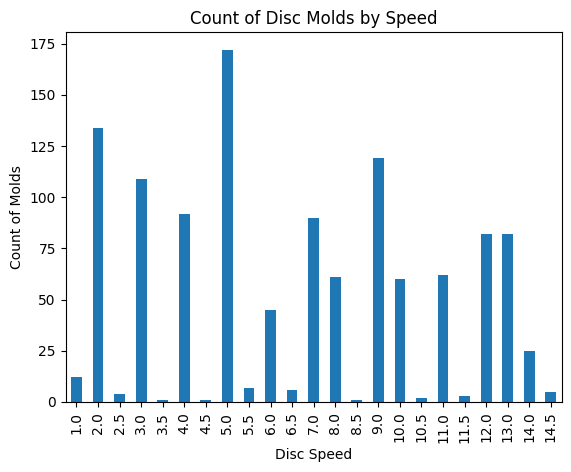

In [1285]:
value_counts = df['SPEED'].value_counts()

sorted_counts = value_counts.sort_index()

sorted_counts.plot(kind='bar')

plt.xlabel('Disc Speed')
plt.ylabel('Count of Molds')
plt.title('Count of Disc Molds by Speed')

plt.show()

This is neat, but still doesn't really tell us anything a disc golfer wouldn't know. The most common discs are putters (speed of 2.0), mid-ranges (speed of 5.0), and control drivers (speed of 9.0). However, later on I would like to build the average disc by flight and dimensions. We can get our first value for the average disc by flight right now:

In [1286]:
average_speed = np.mean(df['SPEED'])

print(average_speed)

6.985531914893617


Let's do the same for glide, turn, and fade:

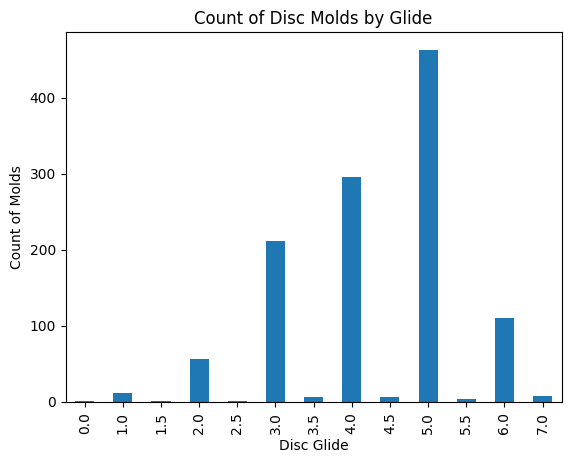

4.291063829787234


In [1287]:
value_counts = df['GLIDE'].value_counts()

sorted_counts = value_counts.sort_index()

sorted_counts.plot(kind='bar')

plt.xlabel('Disc Glide')
plt.ylabel('Count of Molds')
plt.title('Count of Disc Molds by Glide')

plt.show()

average_glide = np.mean(df['GLIDE'])

print(average_glide)

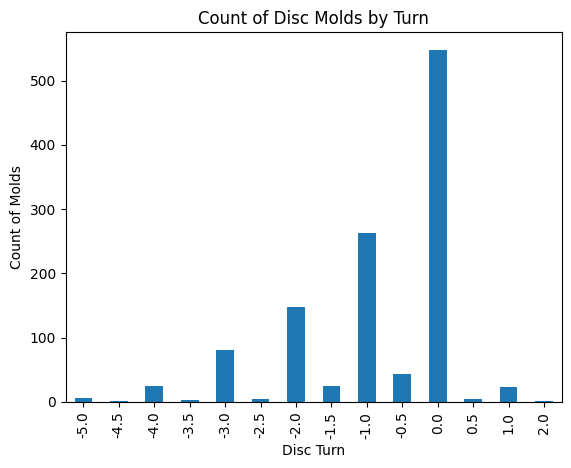

-0.8395744680851064


In [1288]:
value_counts = df['TURN'].value_counts()

sorted_counts = value_counts.sort_index()

sorted_counts.plot(kind='bar')

plt.xlabel('Disc Turn')
plt.ylabel('Count of Molds')
plt.title('Count of Disc Molds by Turn')

plt.show()

average_turn = np.mean(df['TURN'])

print(average_turn)

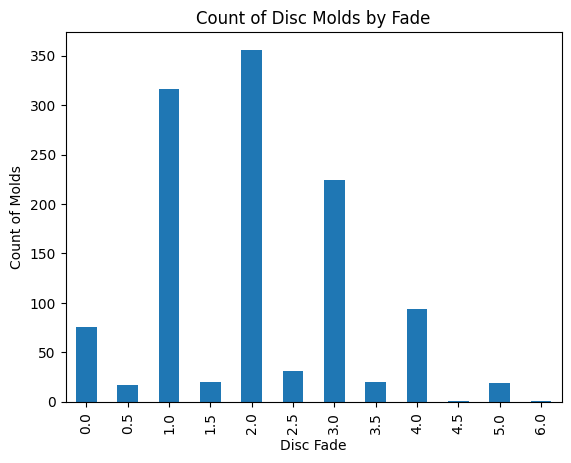

2.0148936170212766


In [1289]:
value_counts = df['FADE'].value_counts()

sorted_counts = value_counts.sort_index()

sorted_counts.plot(kind='bar')

plt.xlabel('Disc Fade')
plt.ylabel('Count of Molds')
plt.title('Count of Disc Molds by Fade')

plt.show()

average_fade = np.mean(df['FADE'])

print(average_fade)

At this point, we have the following measurements for the average disc by flight numbers:

| Attribute |        Value        | Value (Rounded) |
|:---------:|:-------------------:|:---------------:|
|   Speed   |  6.985531914893617  |        7        |
|   Glide   |  4.291063829787234  |        4        |
|    Turn   | -0.8395744680851064 |        -1       |
|    Fade   |  2.0148936170212766 |        2        |

I added the integer value just to make it match what disc golf manufacturers use (the only decimal you'll see is a .5).

Let's see what discs are out there that have these values:

In [1290]:
df_avg_flight = df[df['SPEED'] == 7]

df_avg_flight = df_avg_flight[df_avg_flight['GLIDE'] == 4]

df_avg_flight = df_avg_flight[df_avg_flight['TURN'] == -1]

df_avg_flight = df_avg_flight[df_avg_flight['FADE'] == 2]

average_flight_molds = df_avg_flight['MOLD']

print(average_flight_molds)

591       Cyclone\n
626       Mermaid\n
634    No4 Driver\n
659          Trak\n
Name: MOLD, dtype: object


Interestingly enough, there are only four discs! This is admittedly a bit surprisingly to me. Even more surprising is that none of these discs are very commonly thrown discs, at least not in my disc golf experience.

I have anecdotally noticed more discs that are 7/5/-1/2. I am curious what this would turn up...

In [1291]:
df_avg_flight = df[df['SPEED'] == 7]

df_avg_flight = df_avg_flight[df_avg_flight['GLIDE'] == 5]

df_avg_flight = df_avg_flight[df_avg_flight['TURN'] == -1]

df_avg_flight = df_avg_flight[df_avg_flight['FADE'] == 2]

print(df_avg_flight['MOLD'])

602         F3\n
614    Grackle\n
652    Stalker\n
Name: MOLD, dtype: object


What!? Even fewer discs? Now that's even more interesting. However, the F3 and Stalker are more commonly thrown discs.

One last thing to look at is the average stability. Now, most companies do not advertise stability as a single number, with the only company that consistently does it being Discraft. Even Discraft, however, still advertises the "classic" four-number flight numebrs.

In [1292]:
average_stability = np.mean(df['STABILITY'])

print(average_stability)

1.1736170212765957


The common rule of thumb to determine a stability number is adding the turn and flight together. If we do this for our averages, we get:

In [1293]:
calculated_stability = average_turn + average_fade

print(calculated_stability)

1.17531914893617


Unsurprisingly, we get pretty darn similar numbers: `1.1736` vs `1.1753`. 

### Average Disc Dimensions

Now let's take a look at the average disc dimensions in the same way we did with flight numbers:

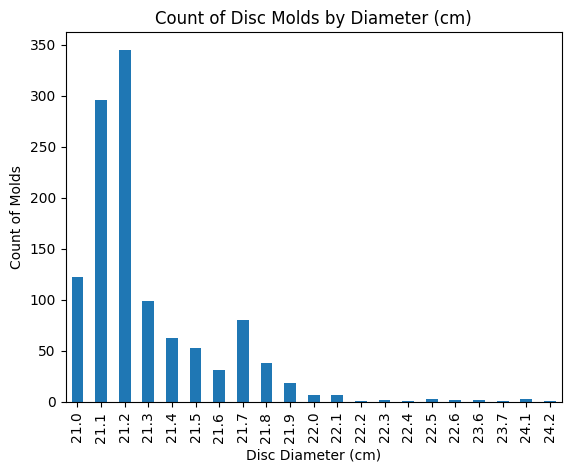

21.2971914893617


In [1294]:
value_counts = df['DIAMETER (cm)'].value_counts()

sorted_counts = value_counts.sort_index()

sorted_counts.plot(kind='bar')

plt.xlabel('Disc Diameter (cm)')
plt.ylabel('Count of Molds')
plt.title('Count of Disc Molds by Diameter (cm)')

plt.show()

average_diameter = np.mean(df['DIAMETER (cm)'])

print(average_diameter)

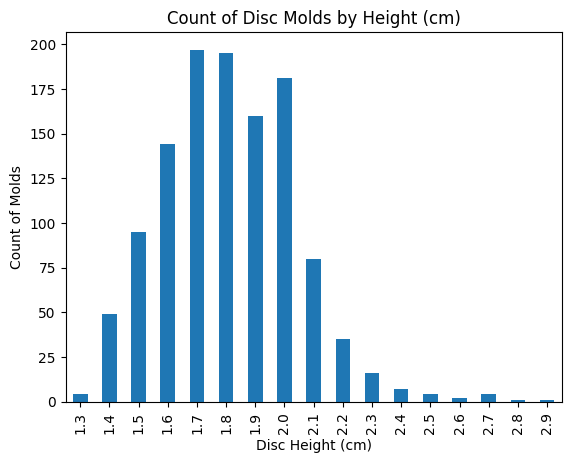

1.8118297872340425


In [1295]:
value_counts = df['HEIGHT (cm)'].value_counts()

sorted_counts = value_counts.sort_index()

sorted_counts.plot(kind='bar')

plt.xlabel('Disc Height (cm)')
plt.ylabel('Count of Molds')
plt.title('Count of Disc Molds by Height (cm)')

plt.show()

average_height = np.mean(df['HEIGHT (cm)'])

print(average_height)

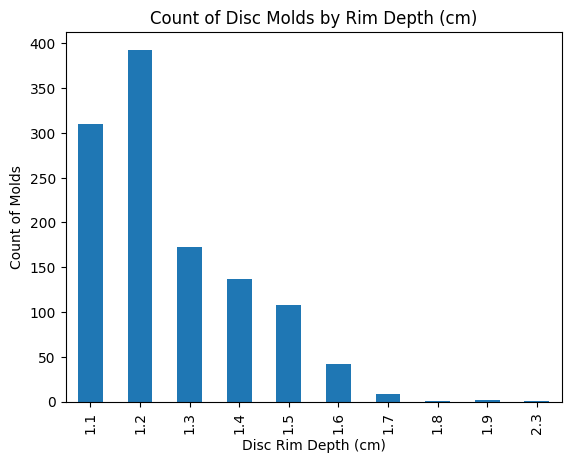

1.2595744680851064


In [1296]:
value_counts = df['RIM DEPTH (cm)'].value_counts()

sorted_counts = value_counts.sort_index()

sorted_counts.plot(kind='bar')

plt.xlabel('Disc Rim Depth (cm)')
plt.ylabel('Count of Molds')
plt.title('Count of Disc Molds by Rim Depth (cm)')

plt.show()

average_depth = np.mean(df['RIM DEPTH (cm)'])

print(average_depth)

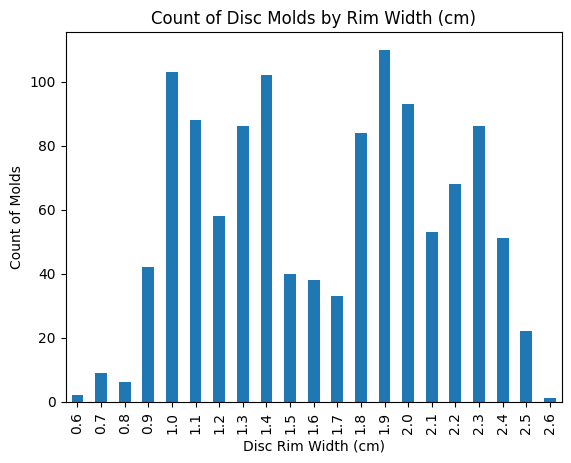

1.6475744680851065


In [1297]:
value_counts = df['RIM WIDTH (cm)'].value_counts()

sorted_counts = value_counts.sort_index()

sorted_counts.plot(kind='bar')

plt.xlabel('Disc Rim Width (cm)')
plt.ylabel('Count of Molds')
plt.title('Count of Disc Molds by Rim Width (cm)')

plt.show()

average_rim_width = np.mean(df['RIM WIDTH (cm)'])

print(average_rim_width)

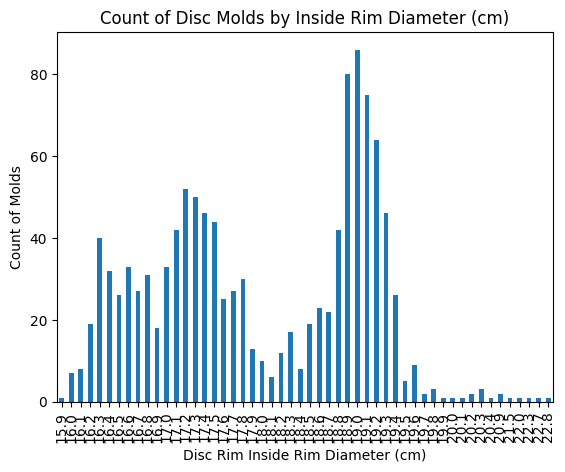

17.991659574468084


In [1298]:
value_counts = df['INSIDE RIM DIAMETER (cm)'].value_counts()

sorted_counts = value_counts.sort_index()

sorted_counts.plot(kind='bar')

plt.xlabel('Disc Rim Inside Rim Diameter (cm)')
plt.ylabel('Count of Molds')
plt.title('Count of Disc Molds by Inside Rim Diameter (cm)')

plt.show()

average_rim_diameter = np.mean(df['INSIDE RIM DIAMETER (cm)'])

print(average_rim_diameter)

So, what we end up with is:

|  Attribute<br>(cm)  |        Value       |
|:-------------------:|:------------------:|
|       Diameter      |  21.2971914893617  |
|        Height       | 1.8118297872340425 |
|      Rim Depth      | 1.2595744680851064 |
|      Rim Width      | 1.6475744680851065 |
| Inside Rim Diameter | 17.991659574468084 |

Now, let's find the 5 discs that measure most closely to these averages:

In [1299]:
avg_values = [average_diameter, average_height, average_depth, average_rim_width, average_rim_diameter]

df['distance'] = np.linalg.norm(df[['DIAMETER (cm)', 'HEIGHT (cm)', 'RIM DEPTH (cm)', 'RIM WIDTH (cm)', 'INSIDE RIM DIAMETER (cm)']].values - avg_values, axis=1)

df_sorted = df.sort_values('distance')

num_similar_rows = 5  
most_similar_rows = df_sorted.head(num_similar_rows)

print(most_similar_rows['MOLD'])

540     Gazelle\n
591     Cyclone\n
551    Magician\n
534     Cheetah\n
682        Binx\n
Name: MOLD, dtype: object


Now let's see if any of these discs are discs we saw earlier:

In [1300]:
common_df = pd.merge(most_similar_rows, average_flight_molds, on=['MOLD'])

print(common_df)

        MOLD       DISC TYPE  SPEED  GLIDE  TURN  FADE  STABILITY  \
0  Cyclone\n  Control Driver    7.0    4.0  -1.0   2.0        1.0   

   DIAMETER (cm)  HEIGHT (cm)  RIM DEPTH (cm)  RIM WIDTH (cm)  \
0           21.3          1.8             1.2             1.6   

   INSIDE RIM DIAMETER (cm)  RIM DEPTH / DIAMETER RATION (%)  \
0                      18.1                              5.6   

   RIM CONFIGURATION BEAD  distance  
0               26.0   No  0.133034  


### Takeaways

Well, here we have it. The Discraft Cyclone is the last disc remaining. Did we just find the world's most average disc golf disc? Perhaps. The Cyclone matches the flight numbers perfectly, and is the most similar to the average disc measurements we used. 

This exercise shows another interesting tidbit, one that is well known in the disc golf community, and that is that there is much variability across disc manufacturers in how they give their discs flight numbers. The current industry standard to give discs flight numbers is to have people throw the discs and to guess what the numbers ought to be.

With this being a major pain-point for disc buyers, many have clamored that there should be a better method. The rest of this notebook is going to explore the practicality of using a machine learning model to assign flight numbers to a disc based on its measurements.

## Modeling

### Building the Model

First, we identify the features and target variables. We are going to use a multivariate linear regression.

In [1301]:
X = df[['DIAMETER (cm)', 'HEIGHT (cm)', 'RIM DEPTH (cm)', 'RIM WIDTH (cm)', 'INSIDE RIM DIAMETER (cm)', 'RIM DEPTH / DIAMETER RATION (%)', 'RIM CONFIGURATION']]  # Input features
y = df[['SPEED', 'GLIDE', 'TURN', 'FADE']]  # Multiple target variables

Now let's make the training and testing set.

In [1302]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

And the model:

In [1303]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

And now, we predict!

In [1304]:
y_pred = model.predict(X_test)

Here are some examples of what the predictions look like:

In [1305]:
np.set_printoptions(suppress=True)
print(y_pred[0:5])

[[ 8.97075461  4.73345305 -1.01284213  2.22984786]
 [ 5.3432268   4.13259166 -0.75432235  1.80675986]
 [ 3.02741705  3.66564372 -0.71494522  1.43688668]
 [ 2.87523154  3.16045347 -0.00302803  1.64368004]
 [ 8.94970464  4.65898847 -0.96485074  2.31222896]]


### Evaluation

Finally, let's see how this model scores and how well it can assign flight ratings to to discs that already exist (and therefore have known flight ratings.)

In [1306]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.9843848627669994
R-squared Score: 0.3784696033168189
Mean Absolute Error: 0.7800068765919858


These numbers are mostly for myself to reference if I try out different models.

Now, let's see how well the model predicts flight numbers for discs that we already know the answer to. Our first test subject will be a Thought Space Athletics Pathfinder, a midrange disc with advertised flight numbers of 5/5/0/1. Let's see what the model predicts given the Pathfinder's dimensions:

In [1307]:
pathfinder_flight_numbers = model.predict([[21.5, 1.7, 1.3, 1.4, 18.6, 6, 43]])
print(pathfinder_flight_numbers)

[[ 5.34291618  4.17894675 -0.7535525   1.87050711]]


Or, in whole numbers,

In [1308]:
print(np.round(pathfinder_flight_numbers))

[[ 5.  4. -1.  2.]]


Interesting. The model suggests that the glide is overstated in the flight numbers that Thought Space Athletics assigns to the disc. Now, this may be letting my personal biases show through a bit, but this is personally not the most surprising thing I have ever seen. I (again, my personal beliefs) feel that companies are likely to overstate the glide of their discs, at least with a disc such as a midrange where effortless distance is desired. Additionally, the numbers the model suggests are the same stability (turn + fade), albeit the model suggesting -1 and 2, respectively, versus 0 and 1 being how the disc is marketed. As an avid thrower of this disc, I think either is fine, but 0 and 1 are a touch more accurate for my game.

Before moving on to another disc, I am going to quickly make a method to make my life easier.

In [1309]:
def predict_flight_numbers(mold_name: str) -> None:
    filtered_df = df[df['MOLD'] == f'{mold_name}\n']

    diameter = filtered_df['DIAMETER (cm)'].iloc[0]
    height = filtered_df['HEIGHT (cm)'].iloc[0]
    rim_depth = filtered_df['RIM DEPTH (cm)'].iloc[0]
    rim_width = filtered_df['RIM WIDTH (cm)'].iloc[0]
    inside_rim_diameter = filtered_df['INSIDE RIM DIAMETER (cm)'].iloc[0]
    rim_over_diameter = filtered_df['RIM DEPTH / DIAMETER RATION (%)'].iloc[0]
    rim_configuration = filtered_df['RIM CONFIGURATION'].iloc[0]

    calculated_flight_numbers = model.predict([[diameter, height, rim_depth, rim_width, inside_rim_diameter, rim_over_diameter, rim_configuration]])
    calculated_flight_numbers = np.squeeze(np.around(calculated_flight_numbers, decimals=0))
    calculated_flight_numbers = np.where(calculated_flight_numbers == -0, 0, calculated_flight_numbers)

    manufacturer_flight_numbers = np.array([filtered_df['SPEED'].iloc[0],
                                filtered_df['GLIDE'].iloc[0],
                                filtered_df['TURN'].iloc[0],
                                filtered_df['FADE'].iloc[0]])

    result = f'Disc: {mold_name}\n---------------------\nManufacturer Flight Numbers: {manufacturer_flight_numbers}\n' + \
        f'  Calculated Flight Numbers: {calculated_flight_numbers}\n'
    
    print(result)

Ok, now that that is done, let's move on to another disc, the Axiom Crave. The Crave is a smaller-rimmed driver that can fly a long way, similar to a wider-rimmed driver. Axiom markets the Crave as a 6.5/5/-1/1. Let's appeal to the model:

In [1310]:
predict_flight_numbers('Crave')

Disc: Crave
---------------------
Manufacturer Flight Numbers: [ 6.5  5.  -1.   1. ]
  Calculated Flight Numbers: [ 8.  4. -1.  2.]



We see that the model actually suggests that the disc should be more of an 8 speed, which I think Crave throwers would agree with in general because of the distance that it is capable of achieving. I personally feel that the glide could be higher from my Crave experiences, but otherwise agree with the calculated flight path. Let's quickly do a more discs just for the heck of it, and I'll let you draw your own conclusions on how well the model performs.

In [1311]:
predict_flight_numbers('Zone')
predict_flight_numbers('Zone OS')
predict_flight_numbers('Stabilizer')
predict_flight_numbers('Destroyer')
predict_flight_numbers('Zeus')
predict_flight_numbers('Trace')
predict_flight_numbers('Delirium')
predict_flight_numbers('Tilt')
predict_flight_numbers('Flare')
predict_flight_numbers('Roc')
predict_flight_numbers('Buzzz')
predict_flight_numbers('Hex')
predict_flight_numbers('Aviar')
predict_flight_numbers('Luna')
predict_flight_numbers('Votum')
predict_flight_numbers('Volt')
predict_flight_numbers('Pilot')
predict_flight_numbers('Praxis')

Disc: Zone
---------------------
Manufacturer Flight Numbers: [4. 3. 0. 3.]
  Calculated Flight Numbers: [ 4.  4. -1.  1.]

Disc: Zone OS
---------------------
Manufacturer Flight Numbers: [4. 2. 1. 5.]
  Calculated Flight Numbers: [4. 3. 0. 2.]

Disc: Stabilizer
---------------------
Manufacturer Flight Numbers: [3.  3.5 0.  3. ]
  Calculated Flight Numbers: [3. 4. 0. 2.]

Disc: Destroyer
---------------------
Manufacturer Flight Numbers: [12.  5. -1.  3.]
  Calculated Flight Numbers: [11.  5. -1.  3.]

Disc: Zeus
---------------------
Manufacturer Flight Numbers: [12.  5. -1.  3.]
  Calculated Flight Numbers: [12.  5. -1.  3.]

Disc: Trace
---------------------
Manufacturer Flight Numbers: [11.  5. -1.  2.]
  Calculated Flight Numbers: [11.  5. -1.  3.]

Disc: Delirium
---------------------
Manufacturer Flight Numbers: [14.5  5.  -0.5  3. ]
  Calculated Flight Numbers: [13.  5. -1.  3.]

Disc: Tilt
---------------------
Manufacturer Flight Numbers: [9. 1. 1. 6.]
  Calculated Flight N

Feel free to save this notebook and put whatever discs your hearts desire into the method.

## Upshot

*Yes, pun intended.*

Hopefully you enjoyed this relatively straightforward exercise. I would like to remind readers that this data set is [available on Kaggle](https://www.kaggle.com/datasets/jakestrasler/disc-golf-disc-flight-numbers-and-dimensions).

So, what are some takeaways that I personally have?

- Disc manufacturers exaggerate glide (and other flight numbers.)
  - Ok, maybe this is just me reinforcing my biases.
- A standard could be created, even just within a manufacturer's own lineup, to create a more standardized flight rating scheme.
- Discs' flights can be predicted easily from the specifications manufactuers provide to the PDGA before they are officially announced.
- Disc manufacturers could easily use this in the reverse and create a model that takes in a desired flight path and provides the dimensions required to make that flight path happen.
  - Maybe this already happens?

Anyways, I hope you enjoyed this read and feel free to reach out to me with ideas of ways that I could do more with this data set, as ultimately the goal of this was just for me to learn.